This problem guides through an example of exploratory data analysis with clustering methods. You will implement a data exploration system that applies clustering methods to explore California’s frequently visited locations from geo-referenced social media data. You will study the properties and computational requirements of some standard clustering methods on a medium-scale dataset.

**Data Description**
This assignment deals with the dataset of 100k tweets collected using the Twitter API over a period of time. The dataset is a JSON file named “tweets.json.” The pair of (lat, lng) coordinates is associated with each tweet corresponding to the user’s location (see Figure 1). The spatial extent of the dataset is the state of California. Other information in each tweet is its unique ID, the user_id, the timestamp, and textual content.
You will work on clustering and visualizing the data samples in geographical space (2 dimensions).
Your submission will consist of a single PDF document describing your results and a code you
used.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip "drive/MyDrive/Datasets/Datasets_HW3.zip" -d "datasets"

Archive:  drive/MyDrive/Datasets/Datasets_HW3.zip
  inflating: datasets/tweets.json    


In [3]:
!pip install haversine

**Part 1. Visualization**
1. Plot all data points available based on the given coordinates in each tweet.
2. Prepare a brief write-up of Part 1 containing the execution time (see Appendix 1)

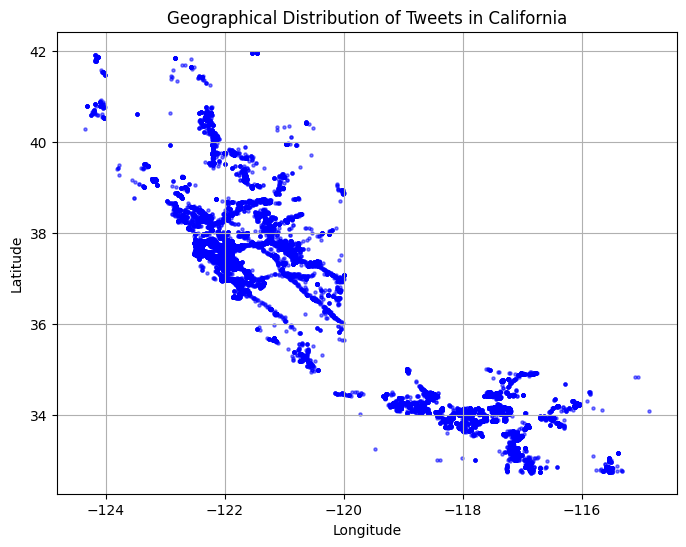

Total computation time: 1.34 seconds


In [11]:
import json
import matplotlib.pyplot as plt
import time

# Record starting time
t0 = time.time()

# Load the tweet data from the JSON file
with open('datasets/tweets.json', 'r') as file:
    tweets = json.load(file)

# Initialize empty lists for longitude (X) and latitude (Y) coordinates
latitudes = []
longitudes = []

# Extract longitude and latitude from each tweet and store in X and Y lists
for tweet in tweets:
    latitudes.append(tweet['lat'])
    longitudes.append(tweet['lng'])

# Plotting the data points on a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(longitudes, latitudes, s=5, c='blue', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Tweets in California')
plt.grid(True)
plt.show()

# Calculate the time taken for computation
t_compute = time.time() - t0

print(f"Total computation time: {round(t_compute, 2)} seconds")

**Part 2: Calculate Data Points Density**
1. In this section, you will calculate the density of data points within a 50 kilometers radius of the given point. The coordinates of the given center points are determined based on the last digit of your student ID in Table 1. Centroid centers are shown in Figure 2
2. You have to calculate distances in meters. To calculate distances in meters, use the Haversine function (see Appendix 1)

In [12]:
from haversine import haversine
import json

# Given center point (replace these coordinates with your specific center point)
center_point = (34.212730341331145, -118.2859001567625)

# Load the tweet data from the JSON file
with open('datasets/tweets.json', 'r') as file:
    tweets = json.load(file)

# Function to calculate distance using Haversine formula
def calculate_distance(coord1, coord2):
    return haversine(coord1, coord2, unit='m')

# Count the number of points within the specified radius
radius = 50 * 1000  # 50 kilometers in meters
points_within_radius = 0

for tweet in tweets:
    tweet_coords = (tweet['lat'], tweet['lng'])
    distance = calculate_distance(center_point, tweet_coords)
    if distance <= radius:
        points_within_radius += 1

print(f"Number of points within a 50 km radius of the center point: {points_within_radius}")

Number of points within a 50 km radius of the center point: 4012


**Part 3: Clustering, the Baseline**

In this part, you have to cluster the data points based on their locations. Since the variations in data points’ coordinations are relatively small, transforming coordinations to meters can enhance the performance. As a result, you can create a coordination system based on the relative distances between the data points. To do this, you can use the Haversine function and create a virtual origin point (0, 0).
Hint: You can consider the origin point with the minimum latitude and the minimum longitude in all data points and calculate distances from this point.

1. K-means Algorithm:
    - Write a script that applies the K-means clustering method to the 100K dataset.
    - Compute the reference time of clustering samples into k=100 clusters.
    - Experimentally detect the maximum number of clusters k that can be handled by implementing the algorithm you are using (Hint: this can be confined by computational limits. If there are no limits, determine the maximum rational number of clusters that should be created, based on your results)
    - Detect the optimum number of clusters using the elbow method (see Appendix 2)

2. Mini Batch K-means Algorithm:
    - Write a script that applies the Mini Batch K-means method to the 100K dataset.
    - Select an appropriate value of batch size (Describe the reason in your documentation).
    - Compute the reference time of clustering samples into k=100 clusters.
    - Measure and note the gain in computational time.
    - Evaluate the maximum number of clusters k that can be handled by implementing the algorithm you are using (Hint: this can be confined by computational limits. If there are no limits, determine the maximum rational number of clusters that should be created, based on your results)
    - Detect the optimum number of clusters using the elbow method (see Appendix 2)

3. DBSCAN Algorithm:
    - Write a script that applies the DBSCAN method to the 100K dataset.
    - Fix the min number of samples in a cluster as 100.
    - Experimentally explore the influence of the connectivity threshold ε on the number of clusters detected by DBSCAN (Hint: this may significantly impact the number of non-included data points, i.e., noise points).
    - Compute the value of ε (call it ε_100) in DBSCAN resulting in approximately 100 clusters of a minimum of samples (‘min_samples = 100’) and the corresponding processing time

Prepare a brief write-up of Part 3 containing the following:
- Describe each step in your scripts.
- Plot essential graphs to show the impacts of parameters’ variation (e.g., elbow diagram).
- Describe the reason for choosing parameters in each step (e.g., number of clusters, eps, and other parameters)
- Compare the results in each part and comment on the algorithms’ efficiency based on the results and the computational time.
- Plot the final results in each algorithm and show the clusters with their centroids (Add your name and your student ID in the title).



---



**K-Means Algorithm:**

The KMeans algorithm is an iterative clustering method used to partition a dataset into K distinct, non-overlapping clusters. The goal is to group data points into clusters where each point belongs to the cluster with the nearest mean (centroid). Here's a breakdown of the key parameters:

- `n_clusters`: This parameter specifies the number of clusters the algorithm aims to create. The algorithm will attempt to partition the dataset into this specified number of clusters.

- `n_init`: KMeans uses random initial centroids to start the clustering process. Since the random initialization can lead to different results, the algorithm runs multiple times with different initial centroids (n_init times). The final model is chosen based on the run that yields the lowest inertia, which represents the sum of squared distances between data points and their assigned centroids.

Tweaking these parameters allows for adjustments in the clustering process. n_clusters defines the expected number of clusters, and n_init controls the number of times the algorithm will run independently to find the best set of clusters with the lowest inertia. Adjustments in these parameters can affect the quality of clustering and the convergence of the algorithm to an optimal solution.

Initially, the origin point is placed at the smallest longitude and latitude coordinates. Then, the data is transformed in a way that their coordinates are specified in meters relative to this origin.

In [14]:
from haversine import haversine

# Initializing x0 and y0 with high values to find the minimum lat & lng
x0 = float('inf')
y0 = float('inf')

# Finding the minimum lat & lng values as origin (x0, y0)
for tweet in tweets:
    if tweet['lat'] < x0:
        x0 = tweet['lat']
    if tweet['lng'] < y0:
        y0 = tweet['lng']

# Converting lat & lng data to x & y based on the origin (x0, y0)
converted_tweets = []
for tweet in tweets:
    x = haversine((x0, 0), (tweet['lat'], 0), unit='m')
    y = haversine((0, y0), (0, tweet['lng']), unit='m')

    # Append converted x and y coordinates to the converted_tweets list
    converted_tweets.append([x, y])

In [32]:
import time
from sklearn.cluster import KMeans

# KMeans configuration
k_means = KMeans(init="k-means++", n_clusters=100, n_init=10)

t0 = time.time()
k_means.fit(converted_tweets)
t_kmeans = time.time() - t0

print(f"Total computation time for KMeans: {round(t_kmeans, 2)} seconds")

Total computation time for KMeans: 9.16 seconds


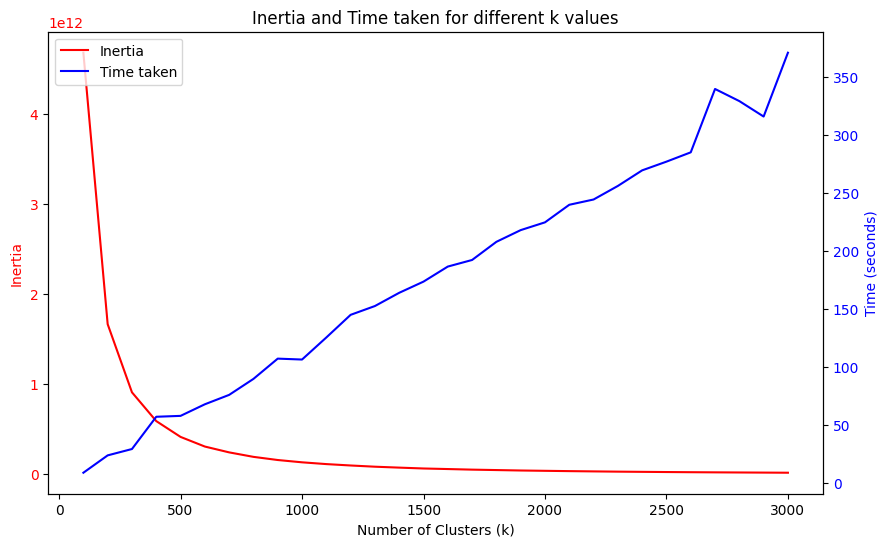

In [27]:
# Lists to store values for plotting
k_values = []
t_values = []
inertia_values = []

# Initialize k and define the step size
k = 100
step = 100

k_max = 3000

# Incrementally vary the number of clusters and observe the performance
while k <= k_max:
    # Create a KMeans object with specific parameters
    k_means = KMeans(init="k-means++", n_clusters=k, n_init=10, random_state=42)

    t0 = time.time()
    k_means.fit(converted_tweets)
    t = time.time() - t0

    # Append values for plotting and analysis
    k_values.append(k)
    t_values.append(t)
    inertia_values.append(k_means.inertia_)

    k += step

# Plotting the variation of time taken and inertia on the same plot with reversed y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting inertia on the left y-axis
ax1.plot(k_values, inertia_values, label='Inertia', color='red')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_title('Inertia and Time taken for different k values')

# Creating a twin y-axis on the right for time taken
ax2 = ax1.twinx()
ax2.plot(k_values, t_values, label='Time taken', color='blue')
ax2.set_ylabel('Time (seconds)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Display legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='upper left')

plt.show()

Based on the elbow method, the optimal number of clusters can be suggested to be around 450~500 clusters. The maximum value of `k`, in a way that the program doesn't encounter resource problems, wasn't found. The maximum meaningful value is considered to be approximately one-tenth of the total number of data, meaning 10,000 clusters.



---



**Mini Batch K-Means Algorithm:**

Mini Batch KMeans is a variation of the KMeans algorithm designed to handle large datasets more efficiently by using mini-batches of data for centroid updates rather than using the entire dataset at each iteration.

- `n_clusters`: This parameter specifies the number of clusters the algorithm will try to form. Each cluster is represented by its centroid, and the algorithm assigns each data point to the nearest centroid, aiming to minimize the within-cluster variance.

- `n_init`: Mini Batch KMeans, similar to traditional KMeans, initializes the centroids multiple times. n_init determines the number of initializations the algorithm will perform independently. The final model is chosen based on the run that yielded the lowest inertia (sum of squared distances from each point to its assigned centroid).

- `batch_size`: Instead of updating centroids using the entire dataset at each iteration, Mini Batch KMeans uses mini-batches of a specified batch_size to update centroids. This parameter controls the number of samples used in each batch for centroid updates. Larger batch sizes can lead to faster computation but might affect the quality of clusters.

- `max_no_improvement`: This parameter controls early stopping during training. It specifies the maximum number of consecutive iterations without improvement in the best inertia. If the inertia doesn't improve for max_no_improvement iterations, the algorithm stops training, even if it hasn't reached convergence.

Tweaking these parameters allows for adjustments in the clustering process, influencing the number of clusters formed, the speed of convergence, and the trade-off between computational efficiency and clustering quality in handling large datasets. Adjustments should be made considering the dataset's characteristics and the desired trade-offs between speed and accuracy in clustering.

In [28]:
from sklearn.cluster import MiniBatchKMeans

# MiniBatchKMeans configuration
mbk = MiniBatchKMeans(
    init="k-means++",       # Method for initialization of centroids
    n_clusters=100,         # Number of clusters
    batch_size=10000,       # Number of samples per batch
    n_init=10,              # Number of initializations
    max_no_improvement=100, # Maximum iterations without improvement
    verbose=0               # Verbosity level
)

t0 = time.time()
mbk.fit(converted_tweets)
t_mini_batch = time.time() - t0

print(f"Total computation time: {round(t_mini_batch, 2)} seconds")

Total computation time: 8.99 seconds


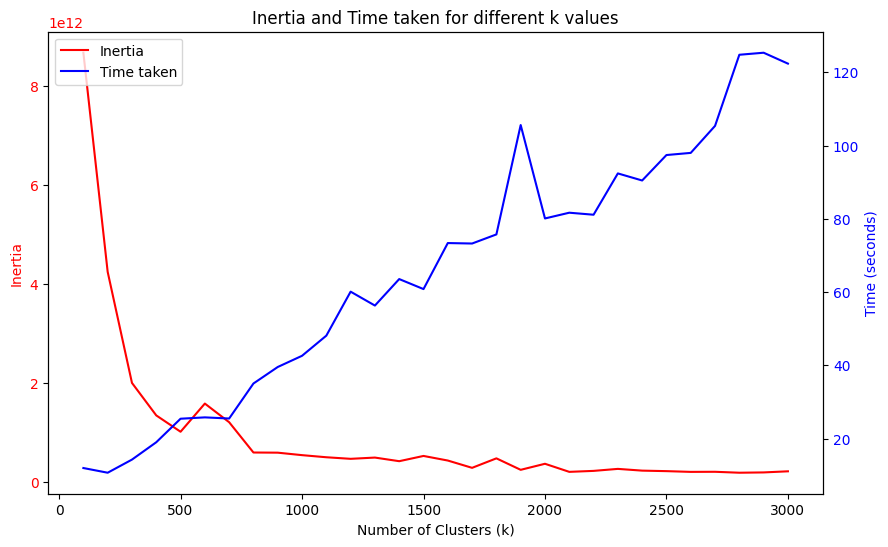

In [29]:
# Lists to store values for plotting
k_values = []
t_values = []
inertia_values = []

step = 100
k = 100

k_max = 3000

while k <= k_max:
    # Configure MiniBatchKMeans with specific parameters for each k value
    mbk = MiniBatchKMeans(
        init="k-means++",
        n_clusters=k,
        batch_size=10000,
        n_init=10,
        max_no_improvement=100,
        verbose=0,
    )

    t0 = time.time()
    mbk.fit(converted_tweets)
    t = time.time() - t0

    # Store values for plotting and analysis
    k_values.append(k)
    t_values.append(t)
    inertia_values.append(mbk.inertia_)

    # Update k and step size for the next iteration
    k = k + step

# Plotting the variation of time taken and inertia on the same plot with reversed y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting inertia on the left y-axis
ax1.plot(k_values, inertia_values, label='Inertia', color='red')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_title('Inertia and Time taken for different k values')

# Creating a twin y-axis on the right for time taken
ax2 = ax1.twinx()
ax2.plot(k_values, t_values, label='Time taken', color='blue')
ax2.set_ylabel('Time (seconds)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Display legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='upper left')

plt.show()

The number of clusters in this method is also considered to be 100. The batch size is also set to one-tenth of the total number of data points (i.e., 10,000). The reason for choosing this number is its adequacy in encompassing a sample from each cluster, minimizing data bias, and its relative smallness compared to the entire dataset.

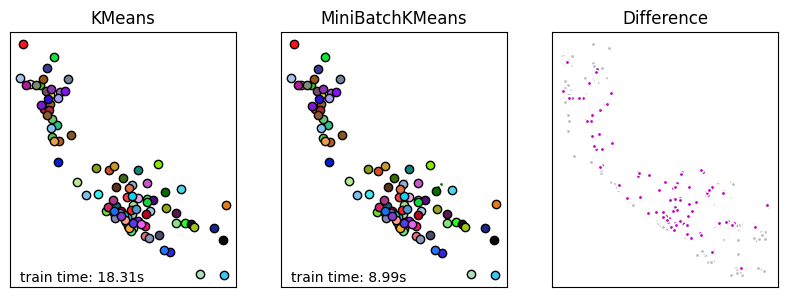

In [30]:
from sklearn.metrics.pairwise import pairwise_distances_argmin
import matplotlib.pyplot as plt
import numpy as np
import random

# Get cluster centers
k_means_cluster_centers = k_means.cluster_centers_
order = pairwise_distances_argmin(k_means.cluster_centers_, mbk.cluster_centers_)
mbk_means_cluster_centers = mbk.cluster_centers_[order]

# Get cluster labels
k_means_labels = pairwise_distances_argmin(converted_tweets, k_means_cluster_centers)
mbk_means_labels = pairwise_distances_argmin(converted_tweets, mbk_means_cluster_centers)

# Create a figure and adjust layout
fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(100)]

# KMeans subplot
converted_tweets = np.array(converted_tweets)
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(100), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(
        converted_tweets[my_members, 0],
        converted_tweets[my_members, 1],
        "w",
        markerfacecolor=col,
        marker="."
    )
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
    )
ax.set_title("KMeans")
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, "train time: %.2fs" % (t_batch))

# MiniBatchKMeans subplot
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(100), colors):
    my_members = mbk_means_labels == k
    cluster_center = mbk_means_cluster_centers[k]
    ax.plot(
        converted_tweets[my_members, 0],
        converted_tweets[my_members, 1],
        "w",
        markerfacecolor=col,
        marker="."
    )
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
    )
ax.set_title("MiniBatchKMeans")
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, "train time: %.2fs" % (t_mini_batch))

# Difference subplot
different = mbk_means_labels == 4
ax = fig.add_subplot(1, 3, 3)
for k in range(100):
    different += (k_means_labels == k) != (mbk_means_labels == k)

identic = np.logical_not(different)
ax.plot(
    converted_tweets[identic, 0],
    converted_tweets[identic, 1],
    "w",
    markerfacecolor="#bbbbbb",
    marker="."
)
ax.plot(
    converted_tweets[different, 0],
    converted_tweets[different, 1],
    "w",
    markerfacecolor="m",
    marker="."
)
ax.set_title("Difference")
ax.set_xticks(())
ax.set_yticks(())

plt.show()

In the above figure, you can observe the difference in clustering between the KMeans and Mini Batch KMeans methods. Additionally, the execution time for each of these methods is visible in the figure.



---



**DBSCAN Algorithm:**

In DBSCAN (Density-Based Spatial Clustering of Applications with Noise), `eps` stands for epsilon, which defines the maximum distance between two samples for them to be considered as part of the same neighborhood. It essentially determines the radius of the neighborhood around a point.

`min_samples` represents the minimum number of samples within the eps radius to define a core point. Any point having at least min_samples within its neighborhood (including itself) is considered a core point. Points that do not satisfy this criterion but are within the eps neighborhood of a core point are labeled as border points, and points that are neither core nor border points are classified as noise points.

These two parameters, `eps` and `min_samples`, are crucial in DBSCAN as they determine the density and distance characteristics used for clustering. Adjusting these values can significantly impact the resulting clusters by influencing the definition of neighborhoods and core points. `eps` defines the proximity threshold, while `min_samples` defines the density required for a point to be considered a core point.

In this method, the minimum number of samples in a cluster is considered to be 100.

Estimated number of clusters: 113
Estimated number of noise points: 27857


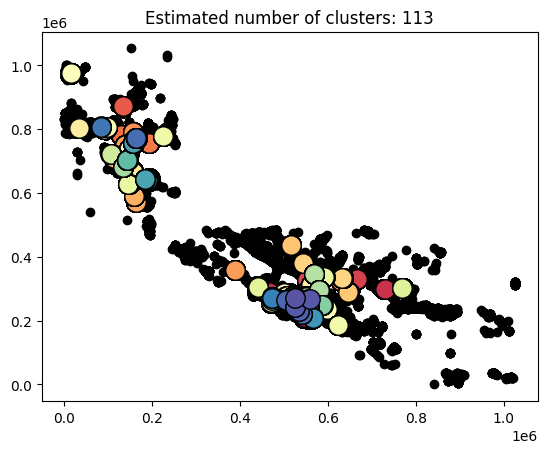

In [31]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Define parameters for DBSCAN
eps = 1000  # Epsilon (neighborhood distance)
min_samples = 100  # Minimum number of samples in a cluster

# Run DBSCAN on the converted_tweets data
db = DBSCAN(eps=eps, min_samples=min_samples).fit(converted_tweets)

# Create masks for core samples and noise points
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Count the number of clusters and noise points
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

# Plot clusters and noise points using different colors
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise points are plotted in black
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    # Plot points that are not core samples
    xy = converted_tweets[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
        zorder=0
    )

    # Plot core samples with larger markers
    xy = converted_tweets[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
        zorder=5
    )

# Set plot title and display the plot
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

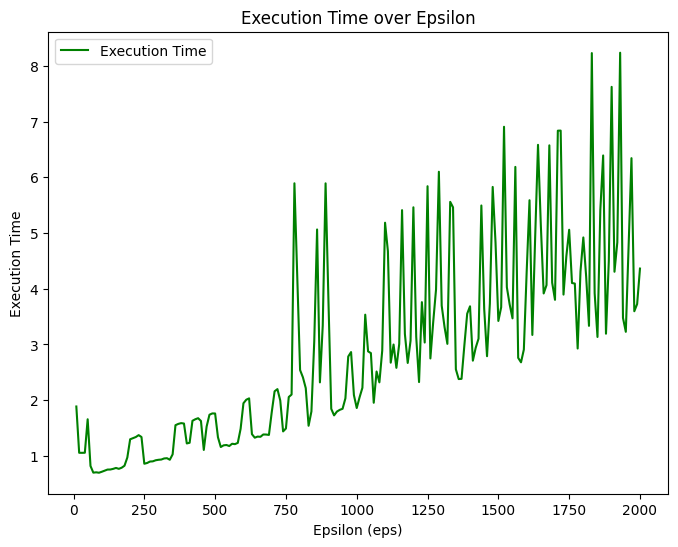

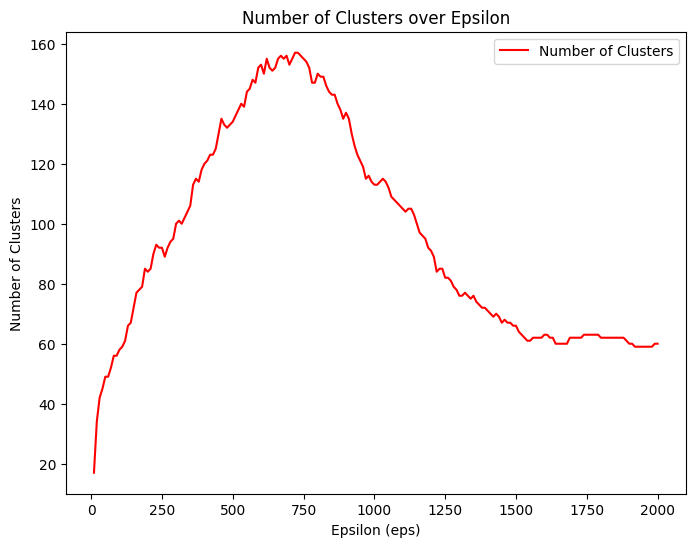

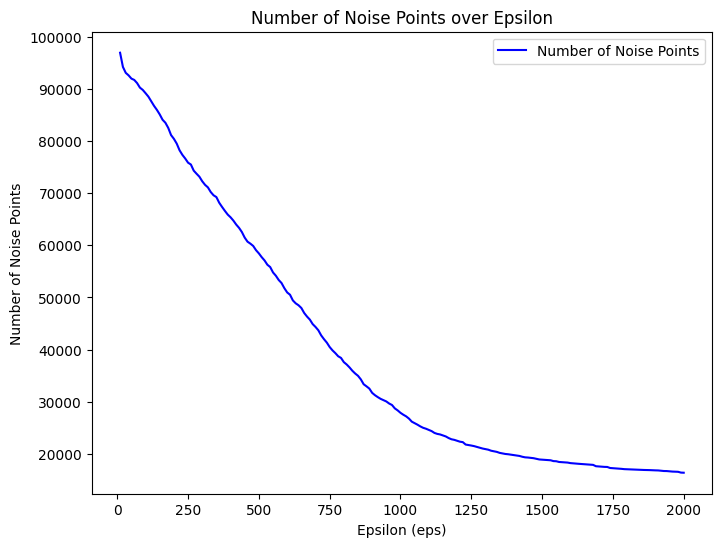

In [34]:
import matplotlib.pyplot as plt

# Lists to store values for plotting
eps_values = []
t_values = []
n_clusters_values = []
n_noise_values = []

# Initialize parameters
centers = 100
eps = 10
eps_max = 2000

while eps <= eps_max:
    # Record starting time
    t0 = time.time()

    # Fit DBSCAN with varying epsilon (eps) values
    db = DBSCAN(eps=eps, min_samples=100).fit(converted_tweets)

    # Retrieve core samples mask and labels
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Count clusters and noise points
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    # Record execution time
    t_exe = time.time() - t0

    # Append values to lists for plotting
    eps_values.append(eps)
    t_values.append(t_exe)
    n_clusters_values.append(n_clusters_)
    n_noise_values.append(n_noise_)

    # Increment epsilon
    eps += 10

# Plotting t_values over eps_values
plt.figure(figsize=(8, 6))
plt.plot(eps_values, t_values, label='Execution Time', color='green')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Execution Time')
plt.title('Execution Time over Epsilon')
plt.legend()
plt.show()

# Plotting n_clusters_values over eps_values
plt.figure(figsize=(8, 6))
plt.plot(eps_values, n_clusters_values, label='Number of Clusters', color='red')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Number of Clusters')
plt.title('Number of Clusters over Epsilon')
plt.legend()
plt.show()

# Plotting n_noise_values over eps_values
plt.figure(figsize=(8, 6))
plt.plot(eps_values, n_noise_values, label='Number of Noise Points', color='blue')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Number of Noise Points')
plt.title('Number of Noise Points over Epsilon')
plt.legend()
plt.show()

As observed in the above figure, the epsilon values that result in the creation of 100 clusters are 320 and 1060.

**Part 4: Clustering, Scalability**

1. For K-means and Mini Batch K-means algorithms, run the experiments and plot the graphs representing the computational time as a function of:

    a) Number of data samples (consider the range of 100 to 100,000) for a fixed `k = 100`

    b) Number of requested clusters `k` (consider the range of 2 to the `k_max` computed in part 3)

2. For the DBSCAN algorithm, plot the graphs representing computational time as a function of the number of samples (consider the range of 100 to 100,000) for a fixed `ε= ε_100`, `min_samples = 100`.

Include the graphs in the write-up of your submission. For each of the three methods, extrapolate the graphs and provide an estimated time required for your implementation to detect at least 100 clusters in a dataset of 1 million samples.

To maintain uniformity of samples, at each stage of program execution, a random subset of the total samples is selected as needed.

**K-Means Algorithm:**

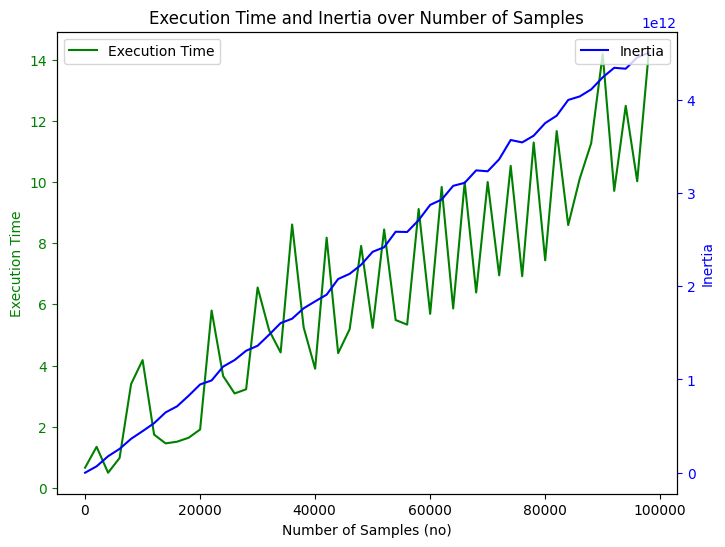

In [36]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Lists to store values for plotting
no_values = []
t_values = []
inertia_values = []

# Set initial values
no = 100
step = 2000
no_max = 100000

while no <= no_max:
    # Randomly sample from converted_tweets with the specified number
    samples = random.sample(np.array(converted_tweets).tolist(), no)

    # KMeans initialization and fitting
    k_means = KMeans(init="k-means++", n_clusters=100, n_init=10)
    t0 = time.time()
    k_means.fit(samples)
    t = time.time() - t0

    # Append values to lists for plotting
    no_values.append(no)
    t_values.append(t)
    inertia_values.append(k_means.inertia_)

    # Increment the number of samples
    no = no + step

# Creating a figure and setting up axes
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plotting t_values on the left y-axis
ax1.plot(no_values, t_values, 'g-', label='Execution Time')
ax1.set_xlabel('Number of Samples (no)')
ax1.set_ylabel('Execution Time', color='g')
ax1.tick_params('y', colors='g')
ax1.legend(loc='upper left')

# Creating a secondary y-axis for inertia_values on the right
ax2 = ax1.twinx()
ax2.plot(no_values, inertia_values, 'b-', label='Inertia')
ax2.set_ylabel('Inertia', color='b')
ax2.tick_params('y', colors='b')
ax2.legend(loc='upper right')

plt.title('Execution Time and Inertia over Number of Samples')
plt.show()

**Mini Batch K-Means Algorithm:**

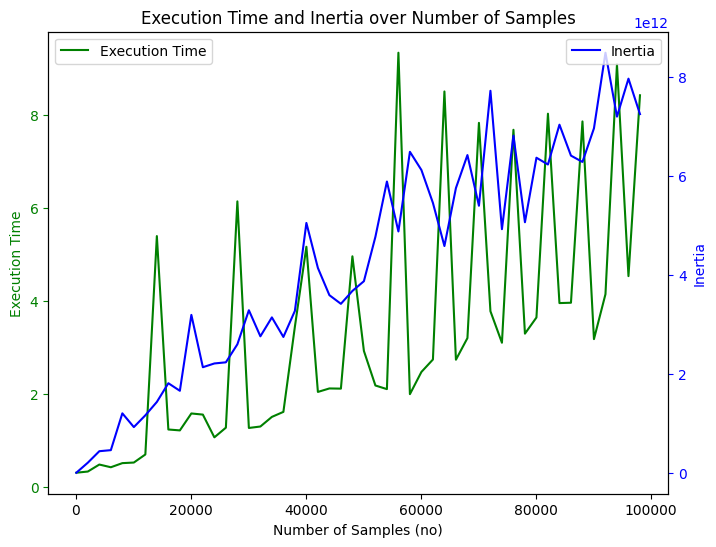

In [37]:
import numpy as np
import random

# Lists to store values for plotting
no_values = []
t_values = []
inertia_values = []

# Initial values and step size for number of samples (no)
no = 100
step = 2000
no_max = 100000

while no <= no_max:
    # Randomly sample from converted_tweets with the specified number
    samples = random.sample(np.array(converted_tweets).tolist(), no)

    # MiniBatchKMeans initialization and fitting
    mbk = MiniBatchKMeans(
        init="k-means++",
        n_clusters=100,
        batch_size=int(no / 10),
        n_init=10,
        max_no_improvement=100,
        verbose=0,
    )
    t0 = time.time()
    mbk.fit(samples)
    t = time.time() - t0

    # Append values to lists for plotting
    no_values.append(no)
    t_values.append(t)
    inertia_values.append(mbk.inertia_)

    # Increment the number of samples
    no = no + step

# Creating a figure and setting up axes
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plotting t_values on the left y-axis
ax1.plot(no_values, t_values, 'g-', label='Execution Time')
ax1.set_xlabel('Number of Samples (no)')
ax1.set_ylabel('Execution Time', color='g')
ax1.tick_params('y', colors='g')
ax1.legend(loc='upper left')

# Creating a secondary y-axis for inertia_values on the right
ax2 = ax1.twinx()
ax2.plot(no_values, inertia_values, 'b-', label='Inertia')
ax2.set_ylabel('Inertia', color='b')
ax2.tick_params('y', colors='b')
ax2.legend(loc='upper right')

plt.title('Execution Time and Inertia over Number of Samples')
plt.show()

**DBSCAN Algorithm:**

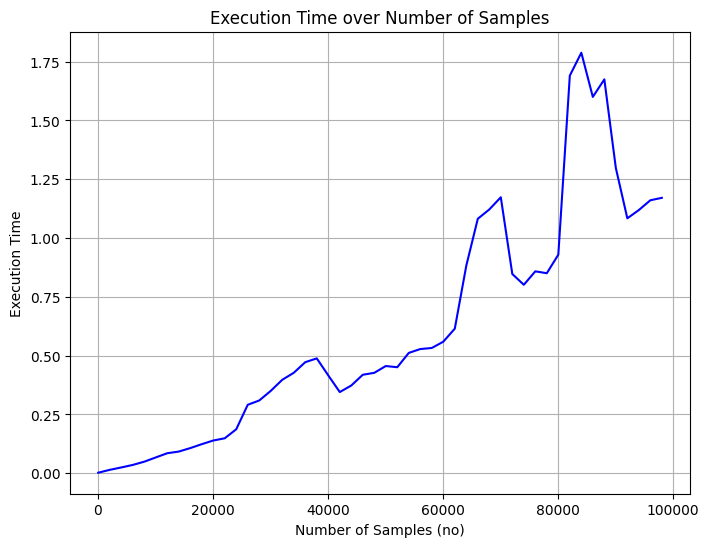

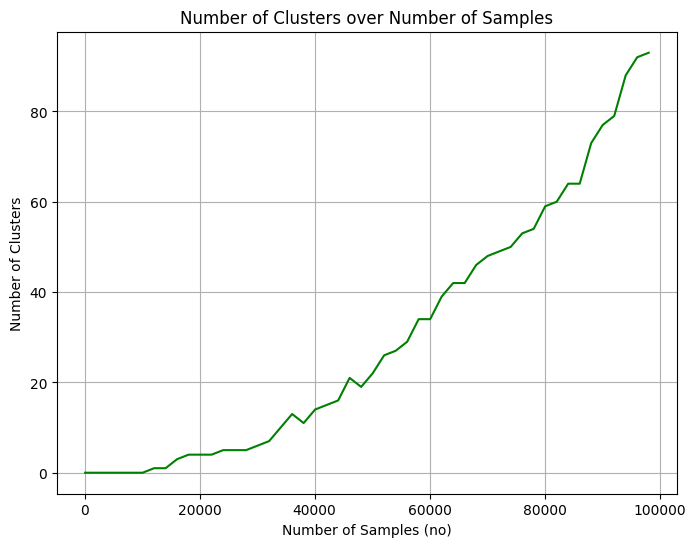

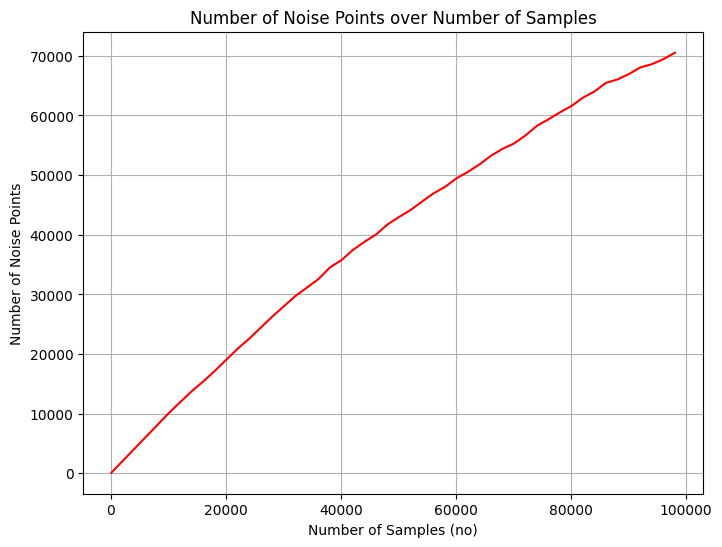

In [39]:
import numpy as np
import time
from sklearn.cluster import DBSCAN
import random
import matplotlib.pyplot as plt

# Lists to store values for plotting
no_values = []
t_values = []
n_clusters_values = []
n_noise_values = []

# Initial values and step size for number of samples (no)
no = 100
step = 2000
no_max = 100000

while no <= no_max:
    # Randomly sample from converted_tweets with the specified number
    samples = random.sample(np.array(converted_tweets).tolist(), no)

    # DBSCAN clustering
    t0 = time.time()
    db = DBSCAN(eps=320, min_samples=100).fit(samples)
    t_exe = time.time() - t0

    # Labels and noise analysis
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Calculating number of clusters and noise points
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    # Appending values to lists for plotting
    no_values.append(no)
    t_values.append(t_exe)
    n_clusters_values.append(n_clusters_)
    n_noise_values.append(n_noise_)

    # Increment the number of samples
    no = no + step

# Plotting execution time (t_values) over number of samples (no_values)
plt.figure(figsize=(8, 6))
plt.plot(no_values, t_values, linestyle='-', color='blue')
plt.xlabel('Number of Samples (no)')
plt.ylabel('Execution Time')
plt.title('Execution Time over Number of Samples')
plt.grid(True)
plt.show()

# Plotting number of clusters (n_clusters_values) over number of samples (no_values)
plt.figure(figsize=(8, 6))
plt.plot(no_values, n_clusters_values, linestyle='-', color='green')
plt.xlabel('Number of Samples (no)')
plt.ylabel('Number of Clusters')
plt.title('Number of Clusters over Number of Samples')
plt.grid(True)
plt.show()

# Plotting number of noise points (n_noise_values) over number of samples (no_values)
plt.figure(figsize=(8, 6))
plt.plot(no_values, n_noise_values, linestyle='-', color='red')
plt.xlabel('Number of Samples (no)')
plt.ylabel('Number of Noise Points')
plt.title('Number of Noise Points over Number of Samples')
plt.grid(True)
plt.show()

**Part 5: Clustering, Finding Relations**

1. Choose one of the K-means or Mini Batch K-means algorithms and use your results in part 3 with k=100 clusters.
2. Find the cluster that contains the centroid enlisted in Table 1 based on your student ID's last digit.
Hint: The centroid is not necessarily a data point. In this case, you can find the nearest data point to the centroid and perform your analysis.
3. In the cluster found in section 2 of this part, search for the trending words or hashtags used in the tweets' text.
4. Find a relation between the used words/hashtags in the cluster and the cluster's geographical location. (e.g., find points of interest in the cluster using Google Maps) Hint: You may be unable to find pertinent points of interest in clusters with a limited number of data points. In this case, you can add up to four adjacent clusters to extend the number of data points and find more sound relations.
5. Describe the proposed relation and plot the cluster containing the suggested points of interest.

In [44]:
from sklearn.cluster import MiniBatchKMeans
import math

# Mini Batch KMeans clustering
mbk = MiniBatchKMeans(
    init="k-means++",
    n_clusters=100,
    batch_size=10000,
    n_init=10,
    max_no_improvement=100,
    verbose=0,
)

t0 = time.time()
mbk.fit(converted_tweets)
t_mini_batch = time.time() - t0

# Function to calculate Euclidean distance between two points
def get_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

# Define a reference point
my_point = [34.212730341331145, -118.2859001567625]

# Calculate distances from 'my_point' to each cluster center
cluster_distances = []
for index, cluster_center in enumerate(mbk.cluster_centers_):
    cluster_distances.append([index, get_distance(my_point, cluster_center)])

# Sort clusters by their distance from 'my_point'
cluster_distances.sort(key=lambda x: x[1])
sliced_clusters = cluster_distances[:5]  # Get the closest 5 clusters
sliced_clusters_indexes = [index for index, _ in sliced_clusters]

# Collect tweets belonging to the closest clusters
cluster_tweets = [tweet for index, tweet in enumerate(tweets) if mbk.labels_[index] in sliced_clusters_indexes]

# Word frequency analysis in tweets of closest clusters
used_words = []
words_count = []
redundant_chars = ['.', ',', ';', '!', '?', '\n', '\r', '"', '\'', '#', '-', '(', ')', '@', '_', ':', '/', '\\']

for tweet in cluster_tweets:
    text = tweet['text'].lower()
    for redundant_char in redundant_chars:
        text = text.replace(redundant_char, '')
    words = text.split(' ')
    for word in words:
        # Remove redundant parts from words and count occurrences
        if word in used_words:
            index = used_words.index(word)
            words_count[index][1] += 1
        elif len(word):
            used_words.append(word)
            words_count.append([word, 1])

# Sort words by frequency
words_count.sort(key=lambda x: x[1], reverse=True)
print(words_count)

[['i', 668], ['the', 558], ['to', 473], ['a', 338], ['you', 330], ['my', 305], ['and', 281], ['in', 233], ['me', 202], ['of', 200], ['is', 197], ['im', 186], ['for', 176], ['on', 157], ['it', 149], ['so', 139], ['this', 135], ['at', 134], ['that', 129], ['with', 119], ['just', 112], ['have', 111], ['like', 103], ['its', 90], ['be', 85], ['lol', 83], ['what', 82], ['up', 80], ['&amp', 78], ['your', 78], ['love', 77], ['not', 75], ['get', 75], ['was', 73], ['dont', 72], ['when', 72], ['good', 72], ['but', 71], ['go', 71], ['do', 71], ['no', 70], ['are', 67], ['all', 66], ['out', 63], ['know', 61], ['if', 61], ['santa', 59], ['we', 58], ['time', 55], ['how', 55], ['cruz', 54], ['now', 51], ['one', 50], ['day', 49], ['about', 47], ['really', 46], ['friday', 46], ['people', 44], ['he', 44], ['can', 42], ['who', 42], ['see', 42], ['need', 42], ['today', 42], ['beach', 42], ['they', 41], ['back', 40], ['from', 40], ['am', 40], ['will', 39], ['why', 38], ['fuck', 38], ['want', 38], ['got', 37]

All of these words belong to commonly used English words, therefore there is no specific relationship between frequently used words and the specific geographical location.



---



**Appendix 1**

- Loading data:
```python
import json
with open('tweets.json', 'r') as f:
    tweets = json.load(f)
```

- Distance Measurement:
```python
from haversine import haversine
a = (37.44610, -121.88356)
b = (40.41085, -122.25005)
haversine(a, b, unit='m')

 >>> 331185.41489855204
```

    Find more about this function's arguments [here](https://pypi.org/project/haversine/).

- Time measurement:
```python
import time
t0 = time.time()
# …
# your code
# …
t_compute = time.time() - t0
```

- Clustering:

 Example of using K-means and Mini Batch K-means in scikit-learn: [link](https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html#example-cluster-plot-mini-batch-kmeans-py)

 Example of using DBSCAN in scikit-learn: [link](https://scikit-learn.org/stable/auto_examples/cluster/plot_DBSCAN.html#example-cluster-plot-DBSCAN-py)

**Appendix 2**

The Elbow method:

The elbow method helps choose the optimum number of clusters in the K-means and Mini Batch K-means algorithms. This method defines the cost function as the sum of squared distances between data points and clusters' respective centroids. We call this cost function WCSS (Within-Cluster-Sum-of-Squares) and use it as a measure of available error. To find the optimum number of clusters, we can plot the WCSS as a function of the number of clusters.